###決定木[回帰木]
https://qiita.com/y_itoh/items/52064b6240fa9979b34e
- 目的変数を数値データとする回帰木
- 目的変数がカテゴリデータの分類木

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor # 回帰木モデルを作成するクラス

- データは、scikit-learnに付属の「Boston house prices dataset」を使います。
- アメリカ北東部の大都市ボストンの住宅事情に関する特徴量が13個、サンプル数は506個です。
- このデータセットの狙いは、与えられた特徴量を使って住宅価格を予測することです。
- 変数名 MEDV(Median valueの略) という住宅の価格がターゲットであり、13個の特徴量は住宅の価格を予測するための説明変数です。
- 説明変数の内容などの詳細はこちら https://qiita.com/y_itoh/items/aaa2056aac0c270ba7d2

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

- 13の説明変数をデータフレームに変換します

In [3]:
# 説明変数をDataFrameに格納
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

print(boston.head()) # 先頭５行を表示
print(boston.columns) # カラム名を表示
print(boston.shape) # 形状を確認

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
(506, 13)


- 目的変数をカラム名MEDVとして追加します

In [4]:
# 目的変数を追加
boston['MEDV'] = boston_dataset.target

print(boston.head()) # 先頭５行を表示
print(boston.shape) # 形状を再確認

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]
(506, 14)


In [5]:
# データセットをNumpy配列に変換
array = boston.values

# 説明変数と目的変数に分ける
X = array[:,0:13]
Y = array[:,13]

- #70%のデータを学習用データ、残りの30%のデータをテストデータとします

In [6]:
# データを分割するモジュールをインポート
from sklearn.model_selection import train_test_split

# データを分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

- 分類木の場合と同じく、fitメソッドに配列 X と Y を渡して学習させますが、この場合 Y は数値型です
- オプションのmax_leaf_nodesで木をどのくらい成長させるかを指定します。ここでは葉ノードの数を最も多くて 20 までとします

In [7]:
# モデルのインスタンス生成
reg = DecisionTreeRegressor(max_leaf_nodes = 20)

# 学習によりモデル生成
model = reg.fit(X_train, Y_train)
print(model)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


- 得られた回帰木モデルを、予測の妥当性(➀)、モデル自体の汎用性(➁)という２つの方向からテストします。
- まず、予測の妥当性を確認するため、サンプル506個の中からランダムに1個を抽出し、その特徴量から予測される価格と実際に観測された価格を比較します。
####➀予測の妥当性を確認する
- 元のデータセットXからランダムにidを1個だけ取り出します

In [8]:
# Python標準の疑似乱数モジュールをインポート
import random
random.seed(1)

# ランダムにidを選定
id = random.randrange(0, X.shape[0], 1)
print(id)

68


In [9]:
# 元のデータセットから該当サンプルを抽出
x = X[id]
x = x.reshape(1,13)

# 説明変数から住宅価格を予測
YHat = model.predict(x)

# 当該idの説明変数をDataFrameに変換
df = pd.DataFrame(x, columns = boston_dataset.feature_names)
# 予測値yを追加
df["Predicted Price"] = YHat

print(df)

      CRIM    ZN  INDUS  CHAS  ...  PTRATIO      B  LSTAT  Predicted Price
0  0.13554  12.5   6.07   0.0  ...     18.9  396.9  13.09        20.453333

[1 rows x 14 columns]


In [10]:
#実際に観測された住宅価格を取得し、比較
boston.iloc[id]

CRIM         0.13554
ZN          12.50000
INDUS        6.07000
CHAS         0.00000
NOX          0.40900
RM           5.59400
AGE         36.80000
DIS          6.49800
RAD          4.00000
TAX        345.00000
PTRATIO     18.90000
B          396.90000
LSTAT       13.09000
MEDV        17.40000
Name: 68, dtype: float64

- 実際の価格17.40に対して、予想価格は20.45という結果となりました
- 次の検証は、モデルの予測値がどのくらい観測値の情報量を説明できているか
####➁汎用性の指標として決定係数を確認する
- 決定係数R2R2は、回帰分析において観測値yyに対する予測値ŷ y^の説明力を表す指標で、寄与率ともいいます
- 0から1までの値をとり、R2R2が1に近いほどモデルが有効であることを意味します

In [11]:
# 決定係数を算出する関数をインポート
from sklearn.metrics import r2_score

In [12]:
#テスト用の説明変数(X_test)をモデルに渡して予測値を算出
YHat = model.predict(X_test)

In [13]:
#これらの予測値とテスト用の目的変数(Y_test)を渡して決定係数を算出
r2 = r2_score(Y_test, YHat)
print("R^2 = ", r2)

R^2 =  0.8296591691702042


####回帰木モデルの可視化

In [14]:
# sklearnのtreeモジュールをインポート
from sklearn import tree

# Notebook内に画像を表示させるモジュール
from IPython.display import Image

# 決定木モデルを可視化するためのモジュール
import pydotplus

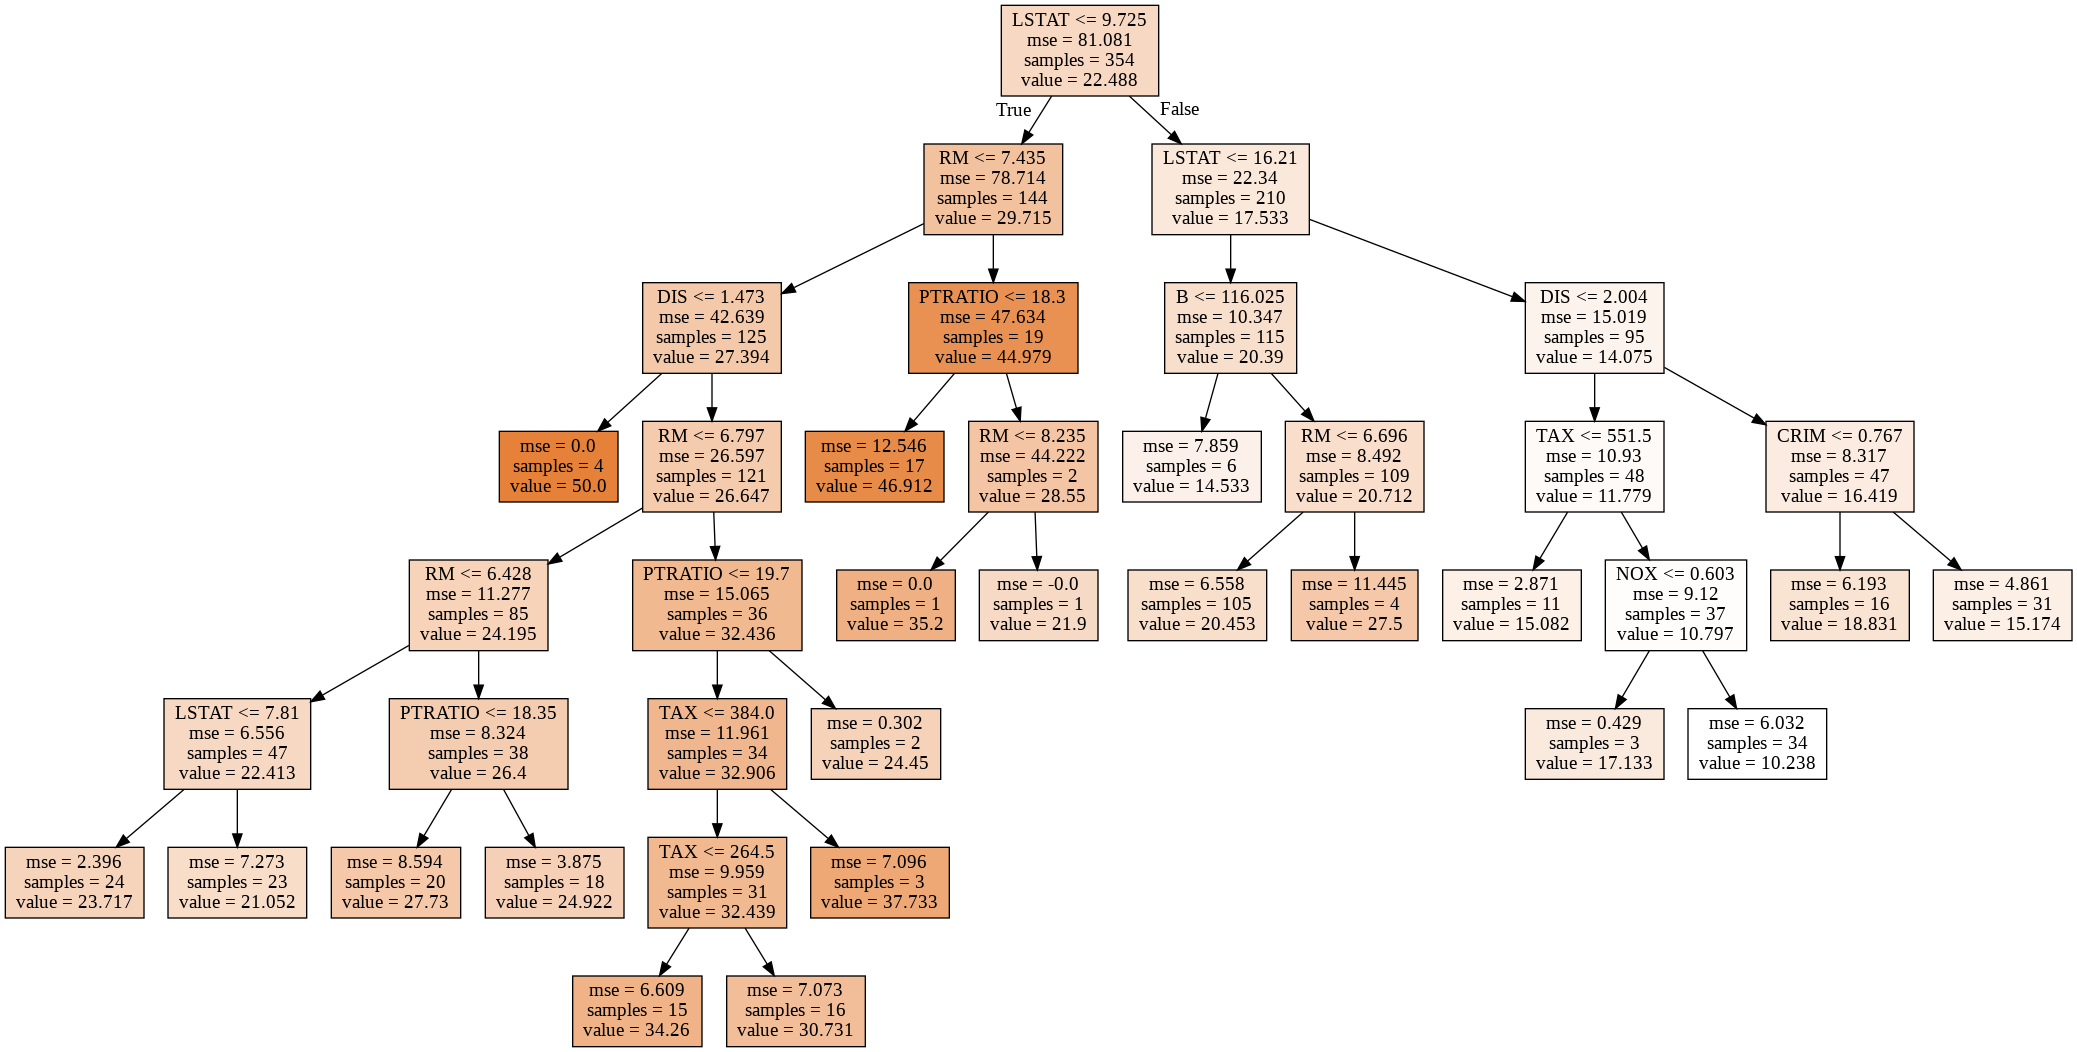

In [15]:
# 決定木モデルをDOTデータに変換
dot_data = tree.export_graphviz(model,
                                out_file = None,
                                feature_names = boston_dataset.feature_names,
                                class_names = 'MEDV',
                                filled = True)

# ダイアグラムを描画
graph = pydotplus.graph_from_dot_data(dot_data)  

# ダイアグラムを表示
Image(graph.create_png())

###aaa